In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 6.9 MB/s 


In [ ]:
!pip install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import visualkeras

In [ ]:
from keras_visualizer import visualizer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
data_eq = np.load('/content/drive/MyDrive/OHRC/subsamples_ohrc_eq_nparray.npy')

In [ ]:
data_eq.shape

(1380, 100, 100)

In [ ]:
clahe = cv2.createCLAHE(tileGridSize=(8,8))

In [ ]:
data_clahe = np.array([])
for i in range(1380):
  cl1 = clahe.apply(data_eq[i])
  data_clahe = np.append(data_clahe,cl1)

In [ ]:
data_clahe.shape

(13800000,)

In [ ]:
data_clahe = data_clahe.reshape([1380,100,100])

In [ ]:
data_clahe.shape

(1380, 100, 100)

Text(0.5, 1.0, 'CLAHE')

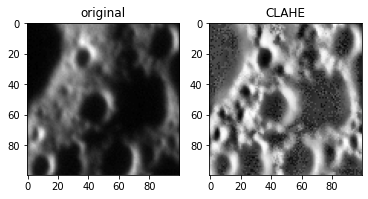

In [ ]:
plt.subplot(1,2,1)
plt.imshow(data_eq[-2],cmap='gray')
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(data_clahe[-2],cmap='gray')
plt.title('CLAHE')


Training Autoencoder on equtor data

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
num_pixels = data_eq.shape[1] * data_eq.shape[2]
x_train_O = data_eq.reshape(data_eq.shape[0], num_pixels).astype('uint8')
x_train_GT = data_clahe.reshape(data_clahe.shape[0], num_pixels).astype('uint8')


In [ ]:
# create model
model = Sequential()
model.add(Dense(400, input_dim=num_pixels, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(10000, activation='relu'))

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               4000400   
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 200)               20200     
                                                                 
 dense_5 (Dense)             (None, 400)               80400     
                                                                 
 dense_6 (Dense)             (None, 10000)            

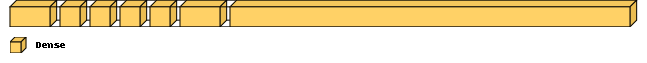

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
visualizer(model, format='png', view=True)

In [ ]:
# Training model
history = model.fit(x_train_O, x_train_GT, epochs=700)

Epoch 1/700
44/44 [==============================] - 4s 72ms/step - loss: 3476.6416
Epoch 2/700
44/44 [==============================] - 3s 71ms/step - loss: 3071.2544
Epoch 3/700
44/44 [==============================] - 3s 70ms/step - loss: 2912.6738
Epoch 4/700
44/44 [==============================] - 3s 70ms/step - loss: 2894.9832
Epoch 5/700
44/44 [==============================] - 3s 71ms/step - loss: 2878.9890
Epoch 6/700
44/44 [==============================] - 3s 71ms/step - loss: 2880.8850
Epoch 7/700
44/44 [==============================] - 3s 70ms/step - loss: 2755.6755
Epoch 8/700
44/44 [==============================] - 3s 71ms/step - loss: 2708.7488
Epoch 9/700
44/44 [==============================] - 3s 71ms/step - loss: 2481.7249
Epoch 10/700
44/44 [==============================] - 3s 70ms/step - loss: 2378.1169
Epoch 11/700
44/44 [==============================] - 3s 69ms/step - loss: 2334.4907
Epoch 12/700
44/44 [==============================] - 3s 70ms/step - loss:

In [ ]:
p1 = model.predict(x_train_O[-2].reshape(1,10000))

1/1 [==============================] - 0s 118ms/step


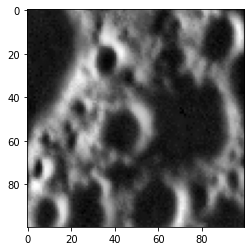

In [ ]:
plt.imshow(p1.reshape(100,100),cmap='gray')

In [ ]:
#REDNet
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, Activation, Flatten, Dense, Input, Add
from tensorflow.keras import initializers, regularizers
from tensorflow.keras.optimizers import Adam

In [ ]:
def create_model_REDNet():
    tf.keras.backend.clear_session()

    input_0 = Input(shape=(100,100,1), name="input_layer")
    conv_layer_1 = Conv2D(filters=256, kernel_size=2, padding='same', name="conv_1")(input_0)
    conv_layer_2 = Conv2D(filters=256, kernel_size=2, padding='same', name="conv_2")(conv_layer_1)
    conv_layer_3 = Conv2D(filters=256, kernel_size=3, padding='same', name="conv_3")(conv_layer_2)
    conv_layer_4 = Conv2D(filters=256, kernel_size=3, padding='same', name="conv_4")(conv_layer_3)
    conv_layer_5 = Conv2D(filters=128, kernel_size=3, padding='same', name="conv_5")(conv_layer_4)

    deconv_layer_5 = Conv2DTranspose(filters=256, kernel_size=2, padding='same', name="deconv_5")(conv_layer_5)
    deconv_layer_5 = Add(name="add_1")([conv_layer_4, deconv_layer_5])
    deconv_layer_4 = Conv2DTranspose(filters=256, kernel_size=2, padding='same', name="deconv_4")(deconv_layer_5)
    deconv_layer_3 = Conv2DTranspose(filters=256, kernel_size=3, padding='same', name="deconv_3")(deconv_layer_4)
    deconv_layer_3 = Add(name="add_2")([conv_layer_2, deconv_layer_3])
    deconv_layer_2 = Conv2DTranspose(filters=128, kernel_size=3, padding='same', name="deconv_2")(deconv_layer_3)
    deconv_layer_1 = Conv2DTranspose(filters=1, kernel_size=3, padding='same', name="deconv_1")(deconv_layer_2)
    out = Add(name="add_3")([input_0, deconv_layer_1])

    model = Model(inputs=[input_0], outputs=[out])
    return model

In [ ]:
REDNet = create_model_REDNet()
REDNet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv_1 (Conv2D)                (None, 100, 100, 25  1280        ['input_layer[0][0]']            
                                6)                                                                
                                                                                                  
 conv_2 (Conv2D)                (None, 100, 100, 25  262400      ['conv_1[0][0]']                 
                                6)                                                            

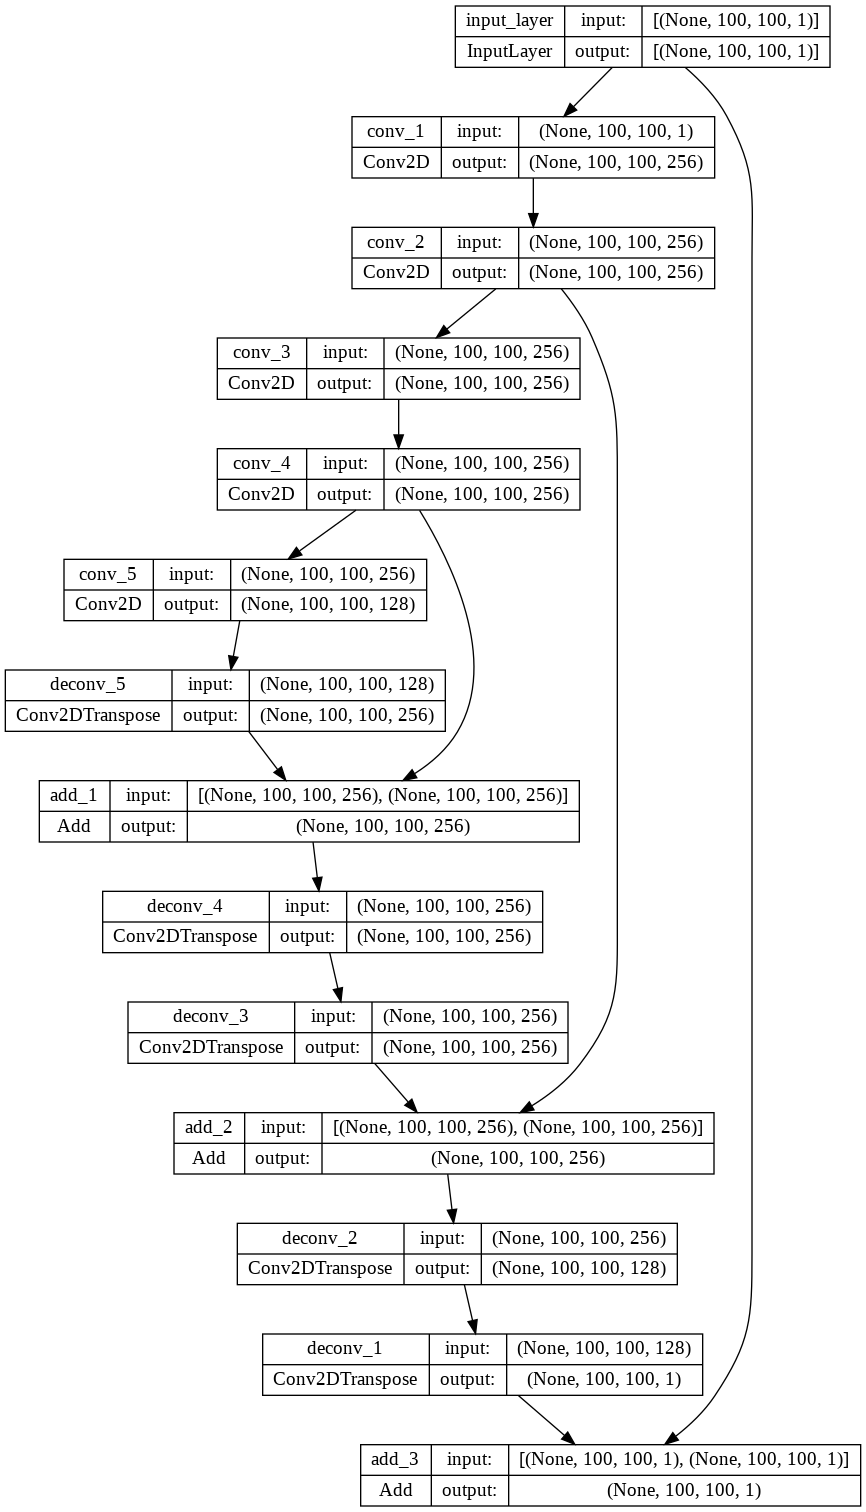

In [ ]:
tf.keras.utils.plot_model(model=REDNet, to_file='model_plot.png', show_shapes=True)

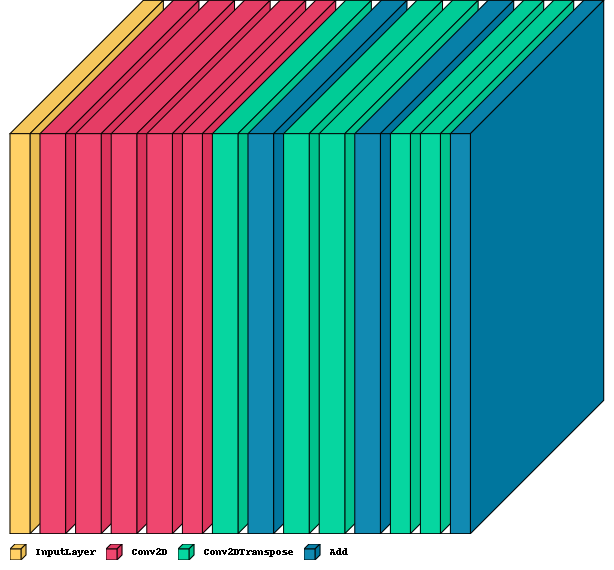

In [ ]:
visualkeras.layered_view(REDNet, legend=True)

In [ ]:
REDNet.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=Adam(learning_rate=0.0001))
REDNet.fit(x_train_O.reshape(1380,100,100,1),x_train_GT.reshape(1380,100,100,1),epochs=200,verbose=1)

Epoch 1/200
44/44 [==============================] - 45s 985ms/step - loss: 1077.7101
Epoch 2/200
44/44 [==============================] - 42s 963ms/step - loss: 521.5052
Epoch 3/200
44/44 [==============================] - 43s 975ms/step - loss: 514.1050
Epoch 4/200
44/44 [==============================] - 43s 970ms/step - loss: 494.9762
Epoch 5/200
44/44 [==============================] - 43s 973ms/step - loss: 485.8874
Epoch 6/200
44/44 [==============================] - 43s 975ms/step - loss: 480.8833
Epoch 7/200
44/44 [==============================] - 43s 976ms/step - loss: 477.6210
Epoch 8/200
44/44 [==============================] - 43s 976ms/step - loss: 463.4898
Epoch 9/200
44/44 [==============================] - 43s 977ms/step - loss: 452.8094
Epoch 10/200
44/44 [==============================] - 43s 975ms/step - loss: 446.0576
Epoch 11/200
44/44 [==============================] - 43s 976ms/step - loss: 454.4185
Epoch 12/200
44/44 [==============================] - 43s 976m

In [ ]:
REDNet.save('//content/drive/MyDrive/OHRC/REDNet_OHRC')

In [ ]:
rp1 = REDNet.predict(x_train_O[-2].reshape(1,100,100,1))

1/1 [==============================] - 1s 687ms/step


In [ ]:
rp1.shape

(1, 100, 100, 1)

Text(0.5, 1.0, 'REDNet Output')

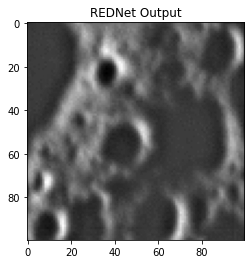

In [ ]:
plt.imshow(rp1.reshape(100,100),cmap='gray')
plt.title('REDNet Output')

In [ ]:
data_s = np.load('/content/drive/MyDrive/OHRC/subsamples_ohrc_south_nparray.npy')

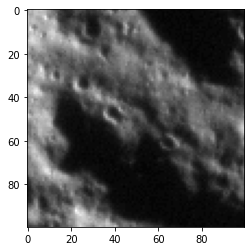

In [ ]:
plt.imshow(data_s[410],cmap='gray')

In [ ]:
rp2 = REDNet.predict(data_s[410].reshape(1,100,100,1))

1/1 [==============================] - 0s 16ms/step


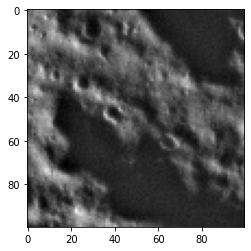

In [ ]:
plt.imshow(rp2.reshape(100,100),cmap='gray')